In [1]:
import pandas as pd
df1 = pd.read_csv("rig_1631472706.6266468.csv")
max_time = 	1631473973

df_wob = pd.read_csv("WOB_1631471720.5912533.csv")
df_wob = df_wob[df_wob["time_s"] > 0]
min_time = 1631473500
df1 = df1[df1["time_s"] > min_time]
df1 = df1[df1["time_s"] < max_time]

df_wob = df_wob[df_wob["time_s"] > min_time]
df_wob = df_wob[df_wob["time_s"] < max_time]

df_power = pd.read_csv("power_meter_1631471720.6355395.csv")
df_power = df_power[df_power["time_s"] > min_time]
df_power = df_power[df_power["time_s"] < max_time]


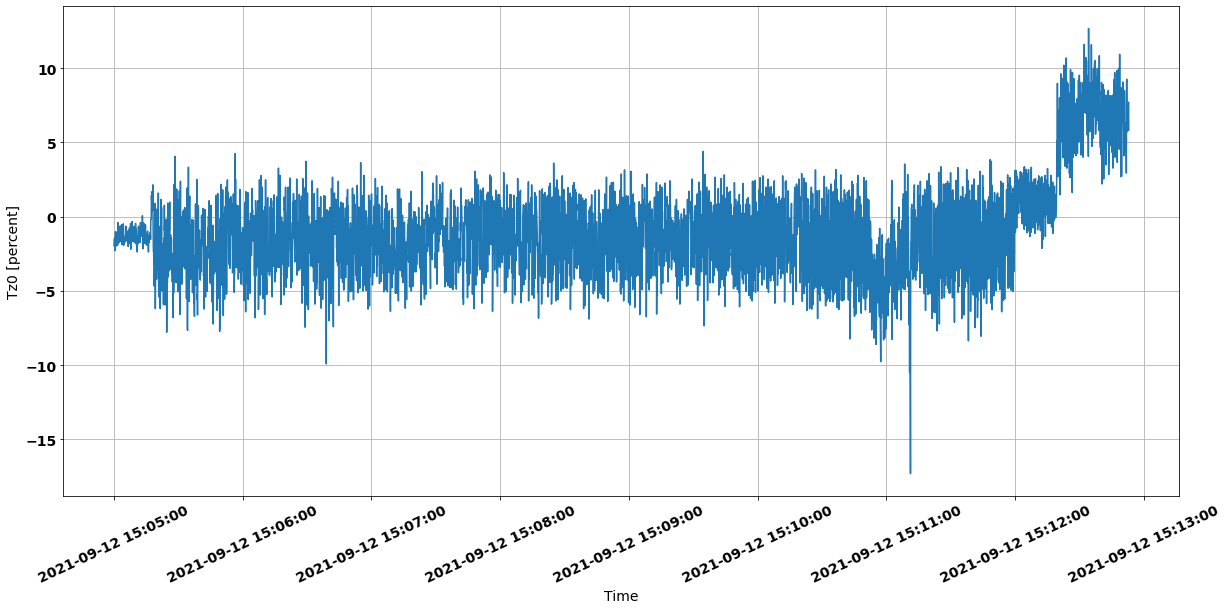

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as md

%matplotlib inline

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

plt.figure(figsize=[20, 10])
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
dates1=[dt.datetime.fromtimestamp(ts) for ts in df1["time_s"] ]
#dates2=[dt.datetime.fromtimestamp(ts) for ts in df2["time_s"] ]

plt.plot(dates1, df1["torque_0_Percent"])
plt.xlabel("Time")
plt.ylabel("Tz0 [percent]")
plt.grid('on')
#plt.ylim([-20, 10])

plt.show()

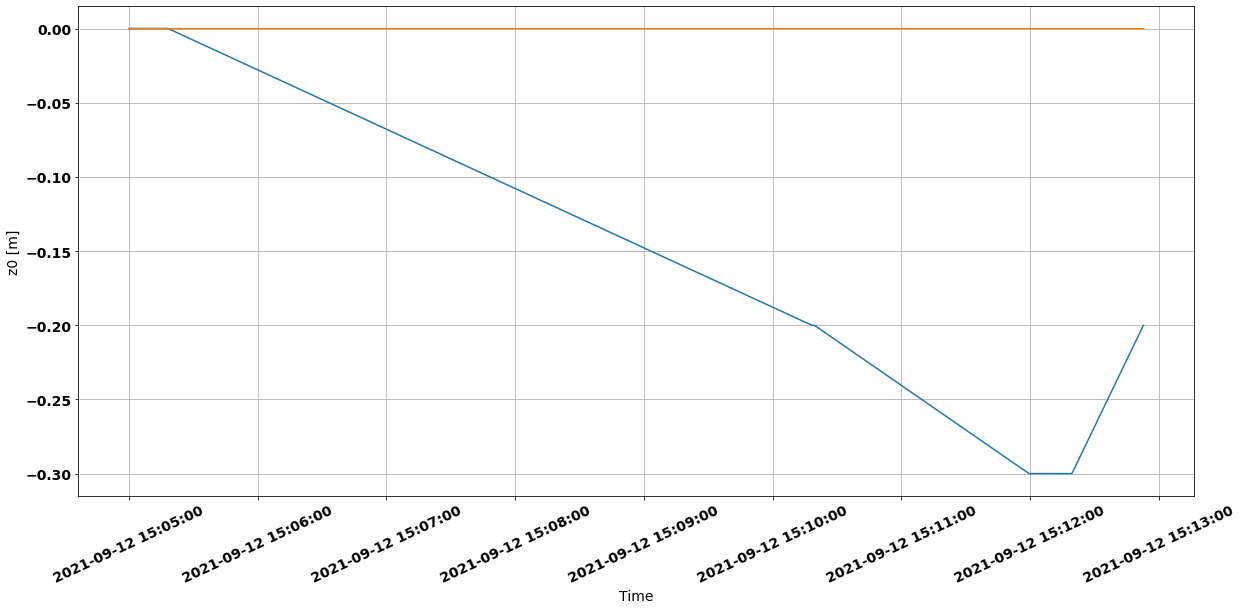

In [3]:
plt.figure(figsize=[20, 10])
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
dates1=[dt.datetime.fromtimestamp(ts) for ts in df1["time_s"] ]
#dates2=[dt.datetime.fromtimestamp(ts) for ts in df2["time_s"] ]

plt.plot(dates1, df1["pos_0_m"])
plt.plot(dates1, df1["pos_1_m"])
plt.xlabel("Time")
plt.ylabel("z0 [m]")
plt.grid('on')
#plt.ylim([-20, 10])

plt.show()

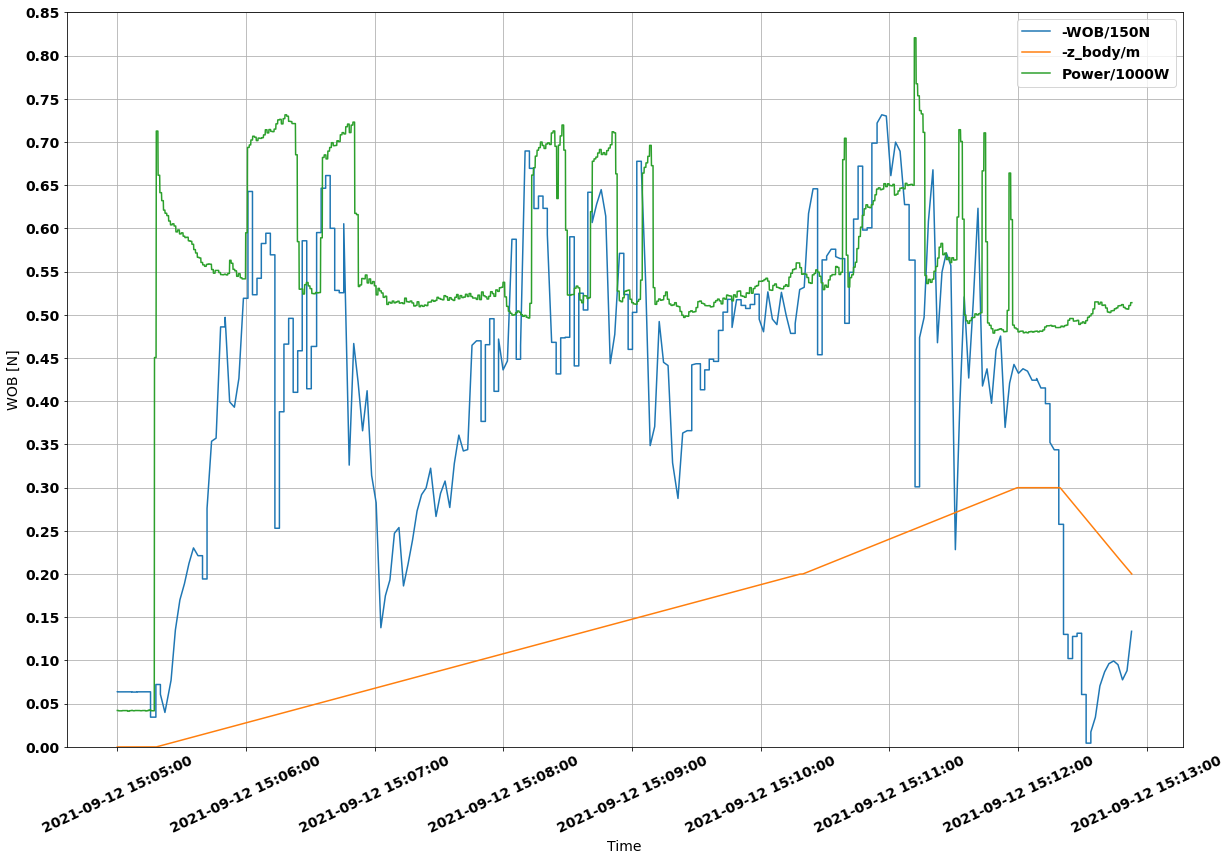

In [7]:
import numpy as np

plt.figure(figsize=[20, 15])
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
dates_wob=[dt.datetime.fromtimestamp(ts) for ts in df_wob["time_s"] ]
dates_power=[dt.datetime.fromtimestamp(ts) for ts in df_power["time_s"] ]

plt.plot(dates_wob, df_wob["wob_n"]/-150.0, label='-WOB/150N')
#plt.plot(dates_wob, df_wob["wob_heater_n"]/150.0)
plt.plot(dates1, -df1["pos_0_m"], label="-z_body/m")
#plt.plot(dates1, df1["torque_0_Percent"]/100 + 0.25)
plt.plot(dates_power, df_power["active_power_W"]/1000, label='Power/1000W')

plt.xlabel("Time")
plt.ylabel("WOB [N]")
plt.grid('on')
major_ticks = np.arange(-1, 1, 0.05)
ax.set_yticks(major_ticks)
plt.ylim([0, 0.85])
plt.legend()

plt.show()

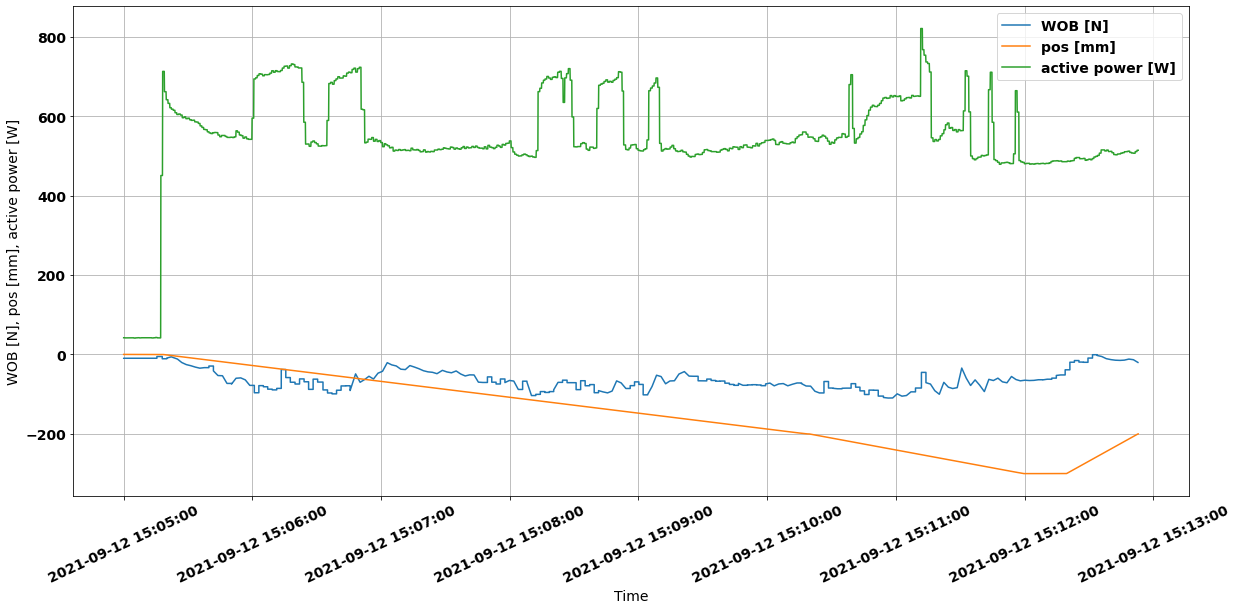

In [8]:
plt.figure(figsize=[20, 10])
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
dates_wob=[dt.datetime.fromtimestamp(ts) for ts in df_wob["time_s"] ]
dates_power=[dt.datetime.fromtimestamp(ts) for ts in df_power["time_s"] ]

plt.plot(dates_wob, df_wob["wob_n"])
plt.plot(dates1, df1["pos_0_m"]*1000)
plt.plot(dates_power, df_power["active_power_W"])


plt.xlabel("Time")
plt.ylabel("WOB [N], pos [mm], active power [W]")
plt.legend(["WOB [N]", "pos [mm]", "active power [W]"])
plt.grid('on')
#plt.ylim([-20, 10])

plt.show()

In [9]:
from scipy import interpolate
df_wob = pd.read_csv("WOB_1630166310.7207458.csv")

ts = df1["time_s"]
f_wob = interpolate.interp1d(df_wob["time_s"], df_wob["wob_n"])
wob_ts = f_wob(ts)

plt.figure(figsize=[20, 10])

plt.plot(df1["pos_0_m"]*1000, wob_ts)
plt.xlabel("pos [mm]")
plt.ylabel("WOB [N]")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'WOB_1630166310.7207458.csv'

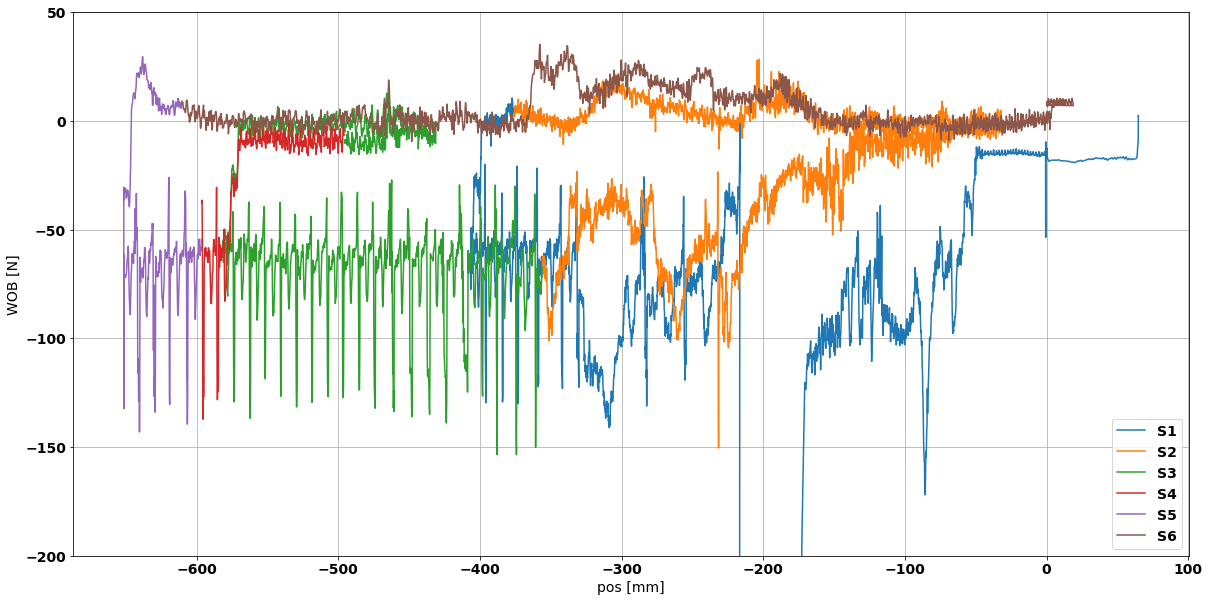

In [93]:
ts = df1["time_s"]
f_wob = interpolate.interp1d(df_wob["time_s"], df_wob["wob_n"])
wob_ts = f_wob(ts)

plt.figure(figsize=[20, 10])

plt.plot(df1["pos_0_m"][0:10000]*1000, wob_ts[0:10000])
plt.plot(df1["pos_0_m"][10000:15000]*1000, wob_ts[10000:15000])
plt.plot(df1["pos_0_m"][15000:17000]*1000, wob_ts[15000:17000])
plt.plot(df1["pos_0_m"][17000:17500]*1000, wob_ts[17000:17500])
plt.plot(df1["pos_0_m"][17500:18000]*1000, wob_ts[17500:18000])
plt.plot(df1["pos_0_m"][18000:]*1000, wob_ts[18000:])


plt.xlabel("pos [mm]")
plt.ylabel("WOB [N]")
plt.ylim([-200, 50])
plt.grid('on')
plt.legend(['S1', 'S2', 'S3', 'S4', 'S5', 'S6'])
plt.show()


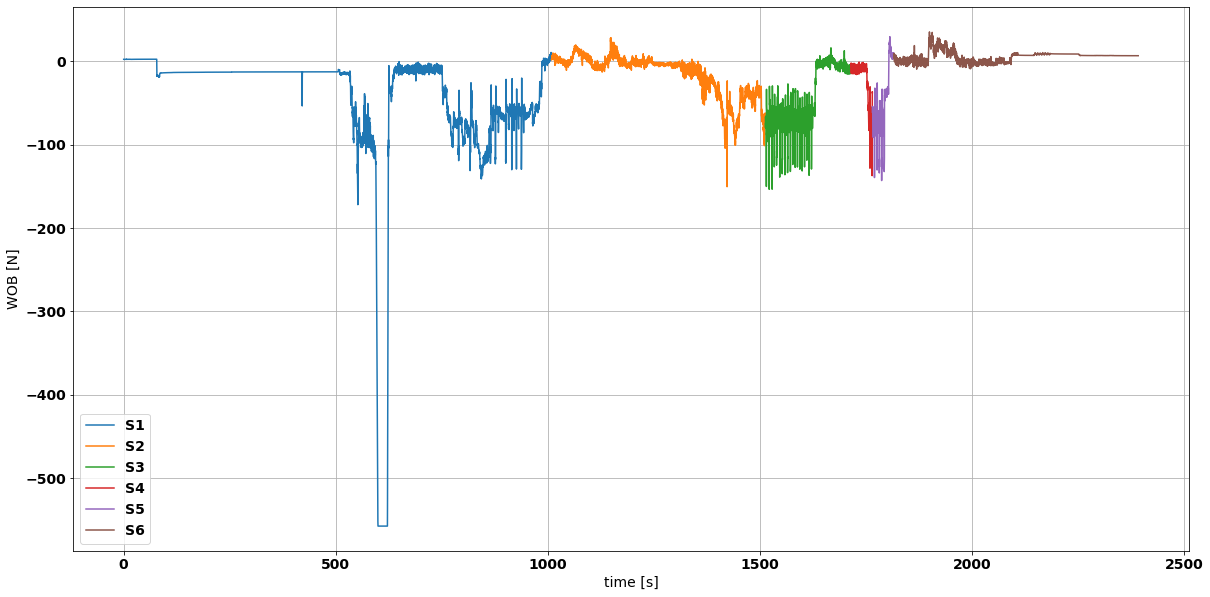

In [102]:
plt.figure(figsize=[20, 10])

plt.plot(ts[0:10000] - ts[0], wob_ts[0:10000])
plt.plot(ts[10000:15000] - ts[0], wob_ts[10000:15000])
plt.plot(ts[15000:17000] - ts[0], wob_ts[15000:17000])
plt.plot(ts[17000:17500] - ts[0], wob_ts[17000:17500])
plt.plot(ts[17500:18000] - ts[0], wob_ts[17500:18000])
plt.plot(ts[18000:] - ts[0], wob_ts[18000:])


plt.xlabel("time [s]")
plt.ylabel("WOB [N]")
#plt.ylim([-200, 50])
plt.grid('on')
plt.legend(['S1', 'S2', 'S3', 'S4', 'S5', 'S6'])
plt.show()

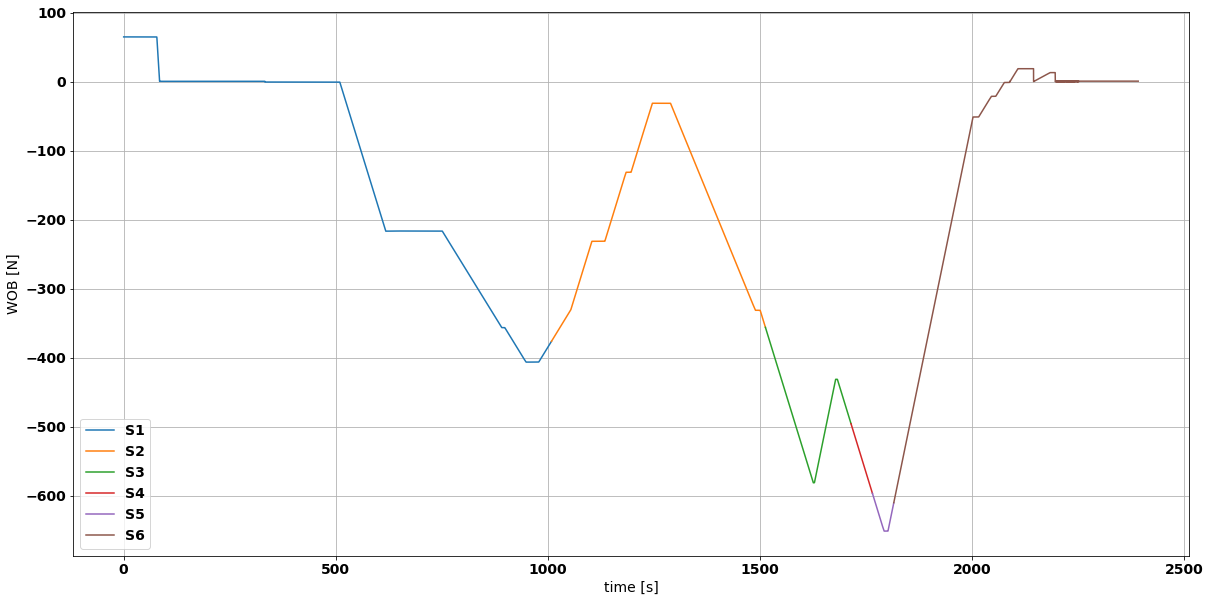

In [100]:
plt.figure(figsize=[20, 10])

plt.plot(ts[0:10000] - ts[0], df1["pos_0_m"][0:10000]*1000)
plt.plot(ts[10000:15000] - ts[0], df1["pos_0_m"][10000:15000]*1000)
plt.plot(ts[15000:17000] - ts[0], df1["pos_0_m"][15000:17000]*1000)
plt.plot(ts[17000:17500] - ts[0], df1["pos_0_m"][17000:17500]*1000)
plt.plot(ts[17500:18000] - ts[0], df1["pos_0_m"][17500:18000]*1000)
plt.plot(ts[18000:] - ts[0], df1["pos_0_m"][18000:]*1000)


plt.xlabel("time [s]")
plt.ylabel("WOB [N]")
#plt.ylim([-200, 50])
plt.grid('on')
plt.legend(['S1', 'S2', 'S3', 'S4', 'S5', 'S6'])
plt.show()

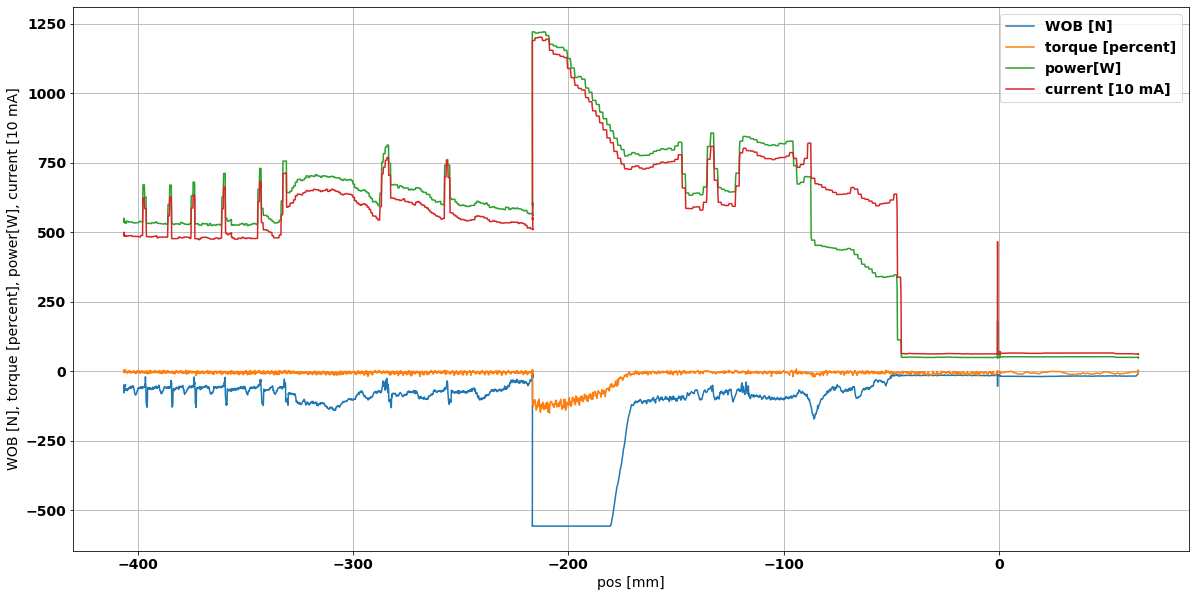

In [124]:
df_wob = pd.read_csv("WOB_1630166310.7207458.csv")
df_power = pd.read_csv("power_meter_1630166310.7556403.csv")

RANGE = 9710

NORM_WOB = -150
NORM_POWER = 1000
NORM_CURRENT = 10000
NORM_TORQUE = -100


ts = df1["time_s"]
f_wob = interpolate.interp1d(df_wob["time_s"], df_wob["wob_n"])
wob_ts = f_wob(ts)
f_power = interpolate.interp1d(df_power["time_s"], df_power["active_power_W"])
power_ts = f_power(ts)
f_current = interpolate.interp1d(df_power["time_s"], df_power["current_mA"])
current_ts = f_current(ts)

plt.figure(figsize=[20, 10])

plt.plot(df1["pos_0_m"][0:RANGE]*1000, wob_ts[0:RANGE])
plt.plot(df1["pos_0_m"][0:RANGE]*1000, df1["torque_0_Percent"][0:RANGE])
plt.plot(df1["pos_0_m"][0:RANGE]*1000, power_ts[0:RANGE])
plt.plot(df1["pos_0_m"][0:RANGE]*1000, current_ts[0:RANGE]/10)

plt.xlabel("pos [mm]")
plt.ylabel("WOB [N], torque [percent], power[W], current [10 mA]")
#plt.ylim([-200, 50])
plt.grid('on')
plt.legend(["WOB [N]", "torque [percent]", "power[W]", "current [10 mA]"])
plt.show()

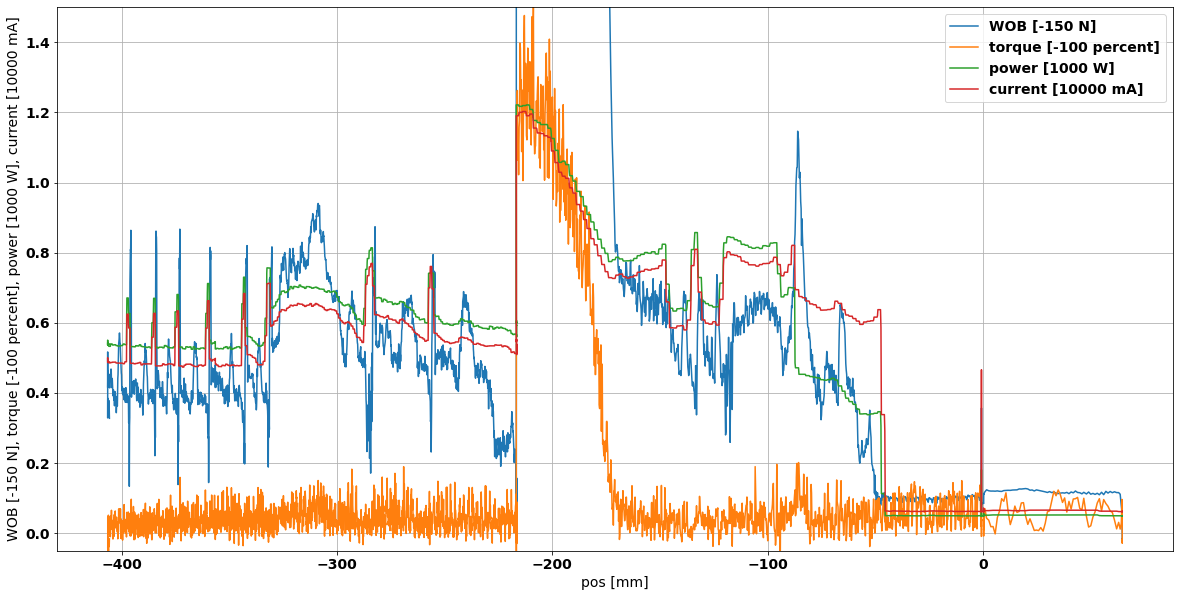

In [129]:
df_wob = pd.read_csv("WOB_1630166310.7207458.csv")
df_power = pd.read_csv("power_meter_1630166310.7556403.csv")

RANGE = 9710

NORM_WOB = -150
NORM_POWER = 1000
NORM_CURRENT = 10000
NORM_TORQUE = -100


ts = df1["time_s"]
f_wob = interpolate.interp1d(df_wob["time_s"], df_wob["wob_n"])
wob_ts = f_wob(ts)
f_power = interpolate.interp1d(df_power["time_s"], df_power["active_power_W"])
power_ts = f_power(ts)
f_current = interpolate.interp1d(df_power["time_s"], df_power["current_mA"])
current_ts = f_current(ts)

plt.figure(figsize=[20, 10])

plt.plot(df1["pos_0_m"][0:RANGE]*1000, wob_ts[0:RANGE]/NORM_WOB)
plt.plot(df1["pos_0_m"][0:RANGE]*1000, df1["torque_0_Percent"][0:RANGE]/NORM_TORQUE)
plt.plot(df1["pos_0_m"][0:RANGE]*1000, power_ts[0:RANGE]/NORM_POWER)
plt.plot(df1["pos_0_m"][0:RANGE]*1000, current_ts[0:RANGE]/NORM_CURRENT)

plt.xlabel("pos [mm]")
plt.ylabel(f"WOB [{NORM_WOB} N], torque [{NORM_TORQUE} percent], power [{NORM_POWER} W], current [{NORM_CURRENT} mA]")
plt.grid('on')
plt.legend([f"WOB [{NORM_WOB} N]", f"torque [{NORM_TORQUE} percent]", 
            f"power [{NORM_POWER} W]", f"current [{NORM_CURRENT} mA]"])
plt.ylim([-0.05, 1.5])
plt.show()